# Indian Death Investigation : What are the most Common Death Causes? 

This notebook analyzes two different datasets to make a generalized conclusion on India's Cause of Death situation. Graphs will be created to analyze and answer 5 different questions:

**1.Is the total deaths in India increasing yearly since 1990? If so does it correlate with India's yearly Birth?**

**2.Is the yearly deaths higher than the yearly birth? What is the trend?**

**3.If India were to receive funding to prevent death rates, which 3 death causes should the funds to go to raise awareness of the problem**

**4.What are the 3 that is least required for expenditure of funding?**

**5.Which year and category had the highest death amount in India?**

In [83]:


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/population-of-india-19502022/indian population new.csv
/kaggle/input/causes-of-death-our-world-in-data/20222703 Causes Of Death Clean Output V2.0.csv
/kaggle/input/causes-of-death-our-world-in-data/20220327 annual-number-of-deaths-by-cause.csv


In [84]:
data_path       = "../input/causes-of-death-our-world-in-data/20220327 annual-number-of-deaths-by-cause.csv"
data_path_clean = "../input/causes-of-death-our-world-in-data/20222703 Causes Of Death Clean Output V2.0.csv"
population_path = "../input/population-of-india-19502022/indian population new.csv"
dataset         = pd.read_csv(data_path)
dataset_clean   = pd.read_csv(data_path_clean)
popDataset      = pd.read_csv(population_path, sep=',') 

In [85]:
INDDataset = dataset.loc[dataset['Entity'] == 'India']
INDDataset.to_csv("Death_Rates_India.csv")
INDDataset = INDDataset.reset_index(drop=True)
INDDataset.rename(columns={'Year': 'Date'}, inplace = True)
INDDataset.drop(['Entity','Code'], axis=1, inplace = True)
INDDataset.fillna(0, inplace=True)

In [86]:
INDDataset['Total_Deaths'] = INDDataset.iloc[:, 4:37].sum(axis=1)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


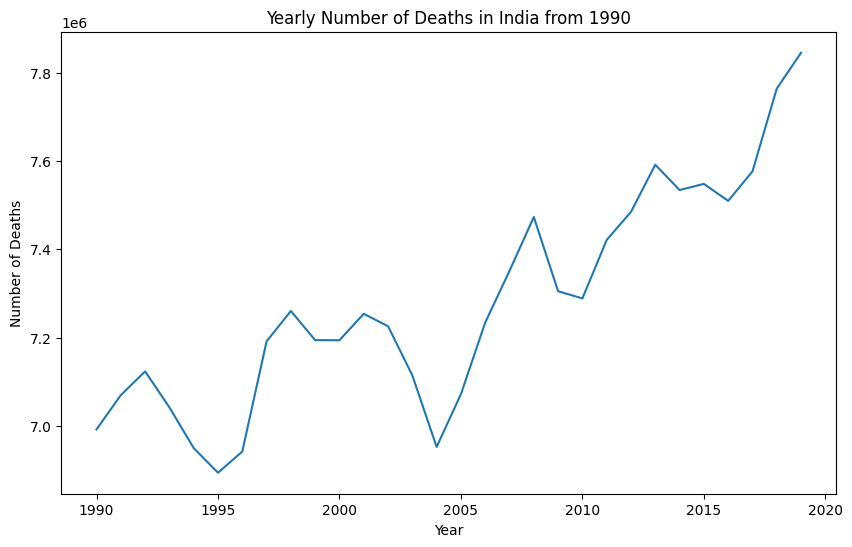

In [87]:
plt.figure(figsize=(10,6))
plt.title("Yearly Number of Deaths in India from 1990")
plt.ylabel("Number of Deaths")
plt.xlabel("Year")
sns.lineplot(x=INDDataset['Date'], y = INDDataset['Total_Deaths'])
plt.show()

FIGURE 1

# India's Yearly Deaths from 1990 - 2020
The line graph above shows an upwards trend of deaths in India. There is a consistent upwards trend until 2003-2004 where a significant drop occured, however the drop brokeout into a massive expotential increase in deaths upto present. The number of deaths in India and its expotential increase may correlate with the population increase of India.

In [88]:
popDataset['Population'] = popDataset['Population'].str.replace(',', '')
popDataset['Population'] = popDataset['Population'].astype('float')
popDataset['Births'] = (popDataset['Birth Rate'] / 1000)* popDataset['Population']
popDataset['Births']= popDataset['Births'].round()
#popDataset.head(2)

In [89]:
popDataset = popDataset.groupby(['Year']).sum()
popDataset = popDataset.reset_index()
popDataset.drop(popDataset.loc[(popDataset['Year'] < 1990) | (popDataset['Year'] > 2019)].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

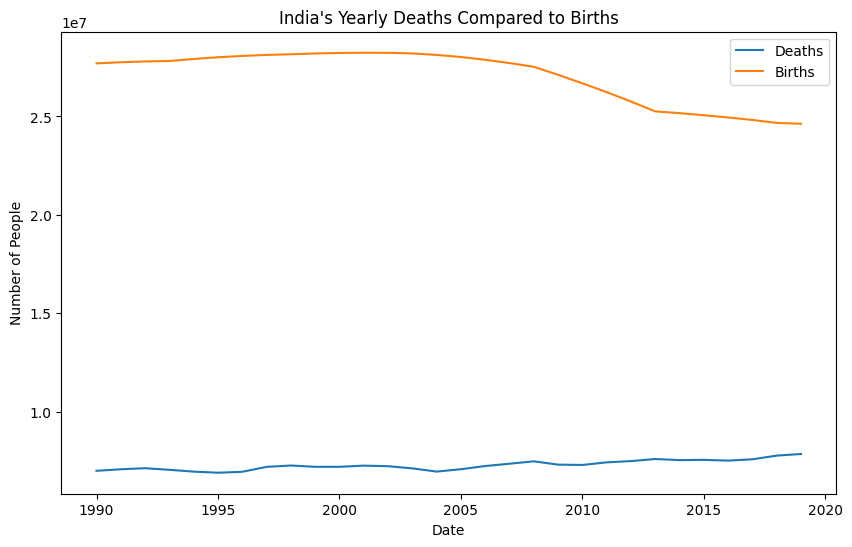

In [90]:
plt.figure(figsize=(10,6))
plt.title("India's Yearly Deaths Compared to Births")
sns.lineplot(x=INDDataset['Date'], y=INDDataset['Total_Deaths'], label='Deaths')
sns.lineplot(x=popDataset['Year'], y=popDataset['Births'], label='Births')
plt.ylabel("Number of People")
plt.show()

FIGURE 2

# India's Yearly Deaths Against Yearly Births
India's yearly births saw a dramatic decline during 2007-2013 period shown in the graph above. However, the annual birth amount is about 9x higher than the annual death. Both events have an upward trend, where the annual death is more steady and predicable while the annual Birth is more volitile which is event in the irregular osscilations up and down especially after 2007.

In [71]:
popDataset.rename(columns={'Year': 'Date'}, inplace=True)
BufferDataset = pd.merge(INDDataset[['Date','Total_Deaths']], popDataset[['Date','Births']], on=['Date'])
BufferDataset.reset_index(drop=True, inplace=True)
#BufferDataset.head()

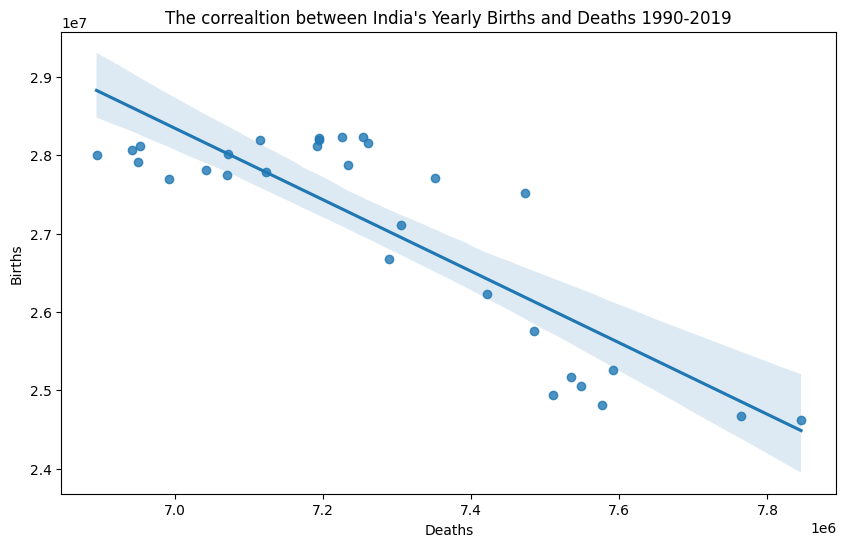

In [91]:
plt.figure(figsize = (10,6))
plt.title("The correaltion between India's Yearly Births and Deaths 1990-2019")
sns.regplot(y='Births', x='Total_Deaths', data=BufferDataset)
plt.xlabel("Deaths")
plt.ylabel("Births")
plt.show()

FIGURE 3

# Correlation of Yearly Births and Yearly Deaths
There is weak linear correlation between India's annual deaths and births, where the regression line does not fit the data accurately. The data points are either signficantly above or below the regression. The cluster of data points around (28 Million, 7 Million) may be outliers which does not follow the general trend of the data, these outliers may be caused by some external factors such as disease outbreak or new laws being passed. 

In [101]:
INDDatasetCleaned = dataset_clean.loc[dataset_clean['Entity'] == 'India'].copy()
INDDatasetCleaned.fillna(0, inplace=True)
DSum = INDDatasetCleaned.groupby(['Causes name']).sum()
DSum.drop('Year', axis=1, inplace=True)
DSum.reset_index(inplace=True)
DSum.sort_values(by=['Death Numbers'], ascending=False, inplace=True)

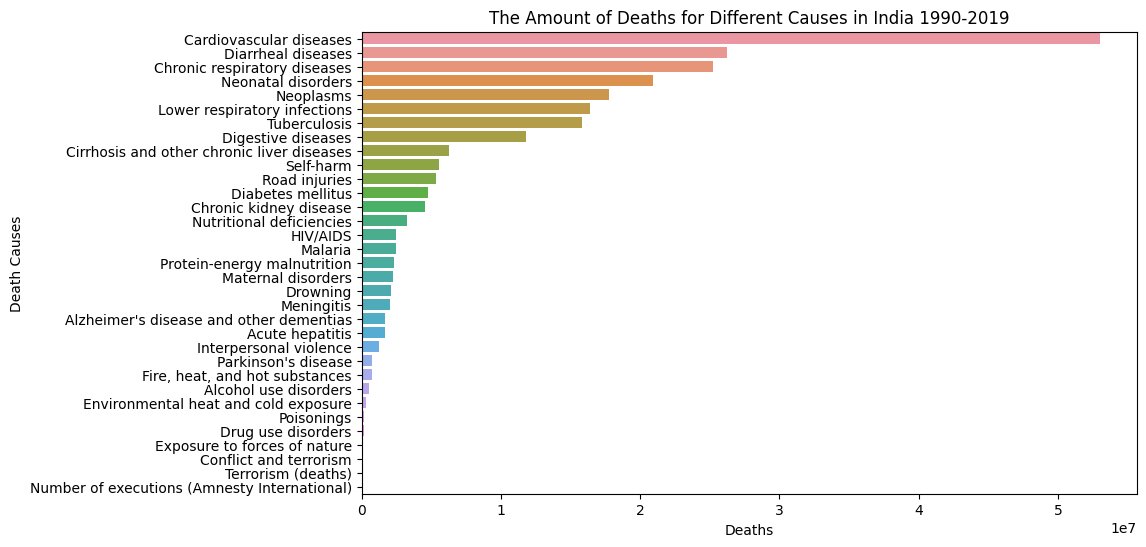

In [93]:
plt.figure(figsize=(10,6))
plt.title('The Amount of Deaths for Different Causes in India 1990-2019')
sns.barplot(y='Causes name', x='Death Numbers', data=DSum)
plt.ylabel('Death Causes')
plt.xlabel('Deaths')
plt.show()

FIGURE 4

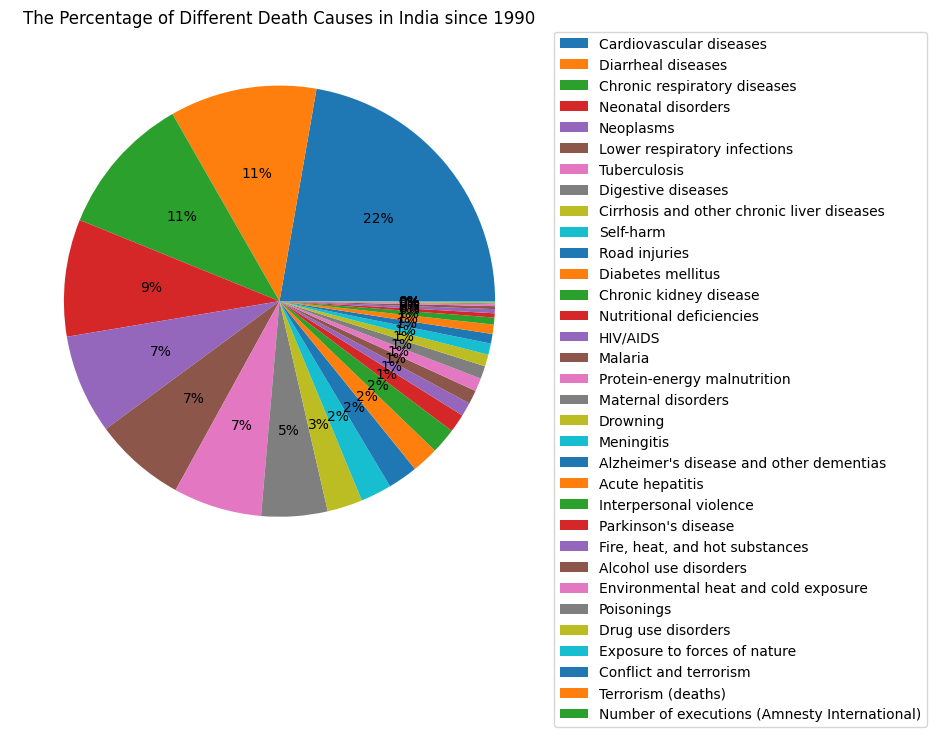

In [96]:
figPie = plt.figure(figsize=(7,7))
figPie.patch.set_facecolor('white')
plt.title("The Percentage of Different Death Causes in India since 1990")
plt.pie(DSum['Death Numbers'], autopct = '%0.0f%%')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, labels=DSum['Causes name'])
plt.show()

FIGURE 5

In [102]:
INDDatasetCleaned.reset_index(drop=True, inplace=True)
INDDatasetCleaned.drop(['Causes Full Description','Entity', 'Code'], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


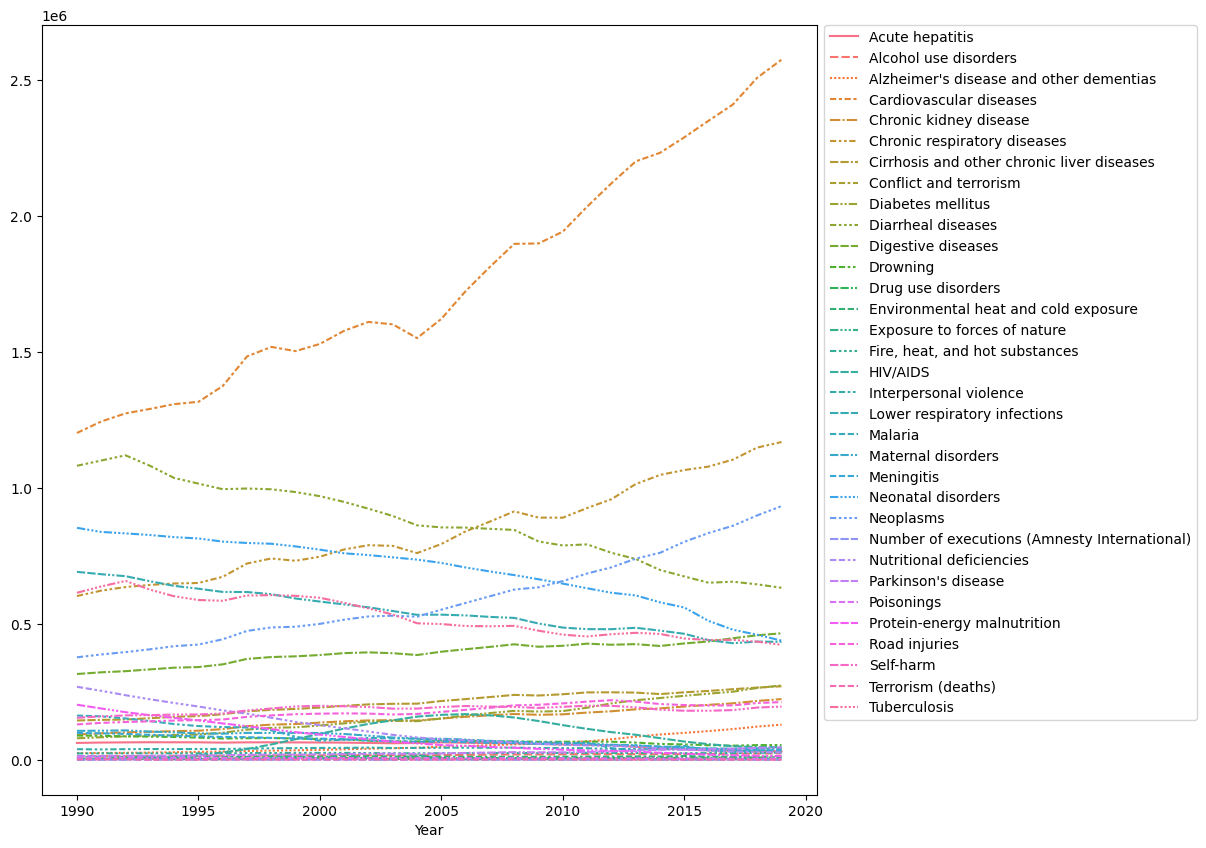

In [103]:
plt.figure(figsize=(10,10))
sns.lineplot(data=pd.pivot_table(INDDatasetCleaned, values='Death Numbers', columns='Causes name', index='Year'))
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

FIGURE 6

In [104]:
removedTopData = INDDatasetCleaned.drop(INDDatasetCleaned[(INDDatasetCleaned['Causes name'] == 'Cardiovascular diseases') | (INDDatasetCleaned['Causes name'] == 'Diarrheal diseases')].index)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


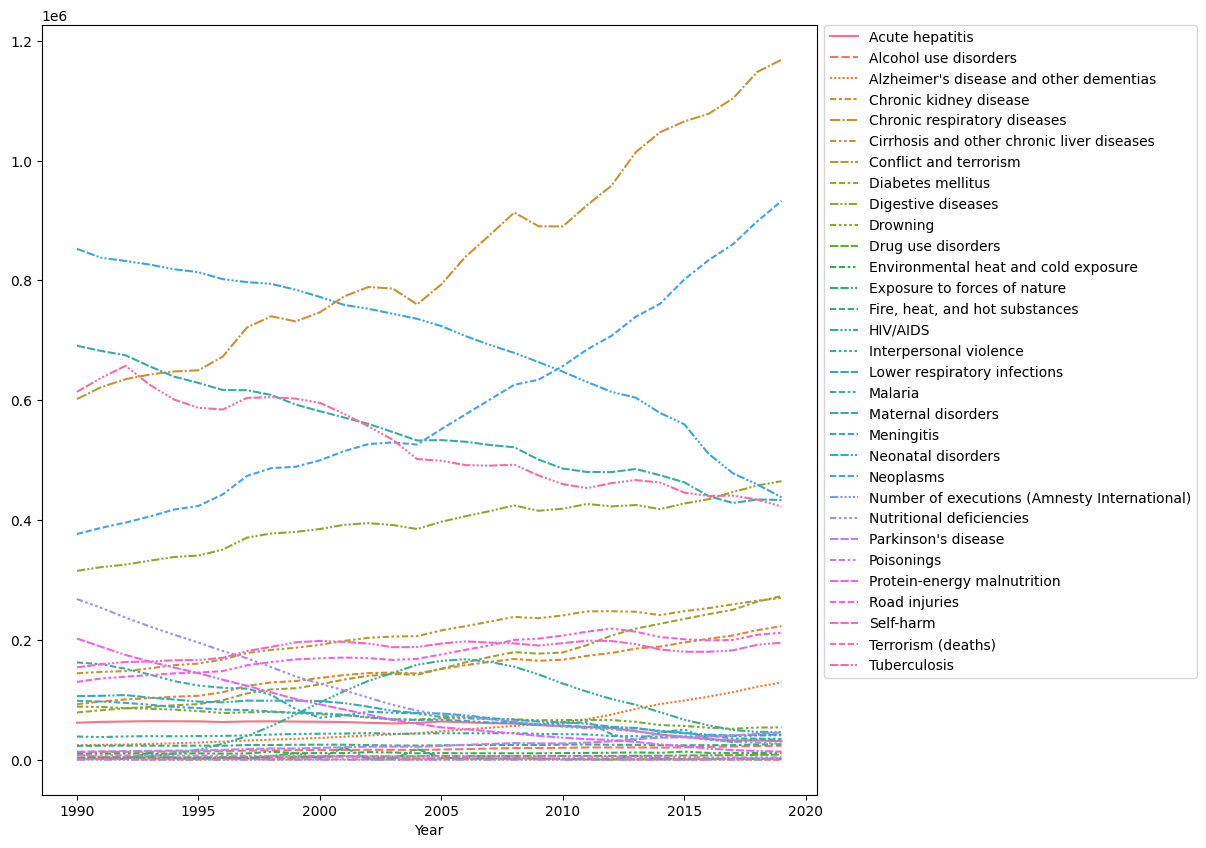

In [105]:
plt.figure(figsize=(10,10))
sns.lineplot(data=pd.pivot_table(removedTopData, values='Death Numbers', columns='Causes name', index='Year'))
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

FIGURE 7

## Most Common Death Causes in India
Figure 4 shows a comparison of all the death causes and their total amount of recorded deaths since 1990. Figure 4 concludes the top 3 most common death causes are cardiovascular diseases, diarrheal diseases and chronic respiratory diseases. Cardiovascular diseases attribute to about 22% of India's total deaths since 1990 (figure 5), which have seen a very recent boom due to the COVID-19 pandemic. It is more likely that the majority of cardiovascular deaths are caused from aging as well, where elderly are prone to heart attacks and strokes. In figure 6, cardiovascular disease is also ranked first as of 2019. To prevent this funding will need to spent on raising awareness of exercising and having a balanced diet.

The second most common death cause in India is Diarrheal diseases with about 11% of the total deaths. There are many  environmental factors that contribute to Diarrheal diseases such as Infectious Agents(Bacteria, Viruses and parasites) and Contaminants. Funding  should be put in rasing awareness of what enviornmental factors contribute to the chances of contracting Diarrhea symptims and also increasing the overall environmental and social surrounding health. 

The third most common death cause in India is chronic respiratory diseases shown in figure 4, contributing to again 11% of India's total deaths. Chronic respitory diseases are mostly caused by behavioural factors and evnironmental factors such as smoking(second hand as well) and chemical fumes. Funding should spent on raising awareness for the consequences of smoking and chemical dangers.

Funding for advertisement should not be put in drug use, executions and terrorism.

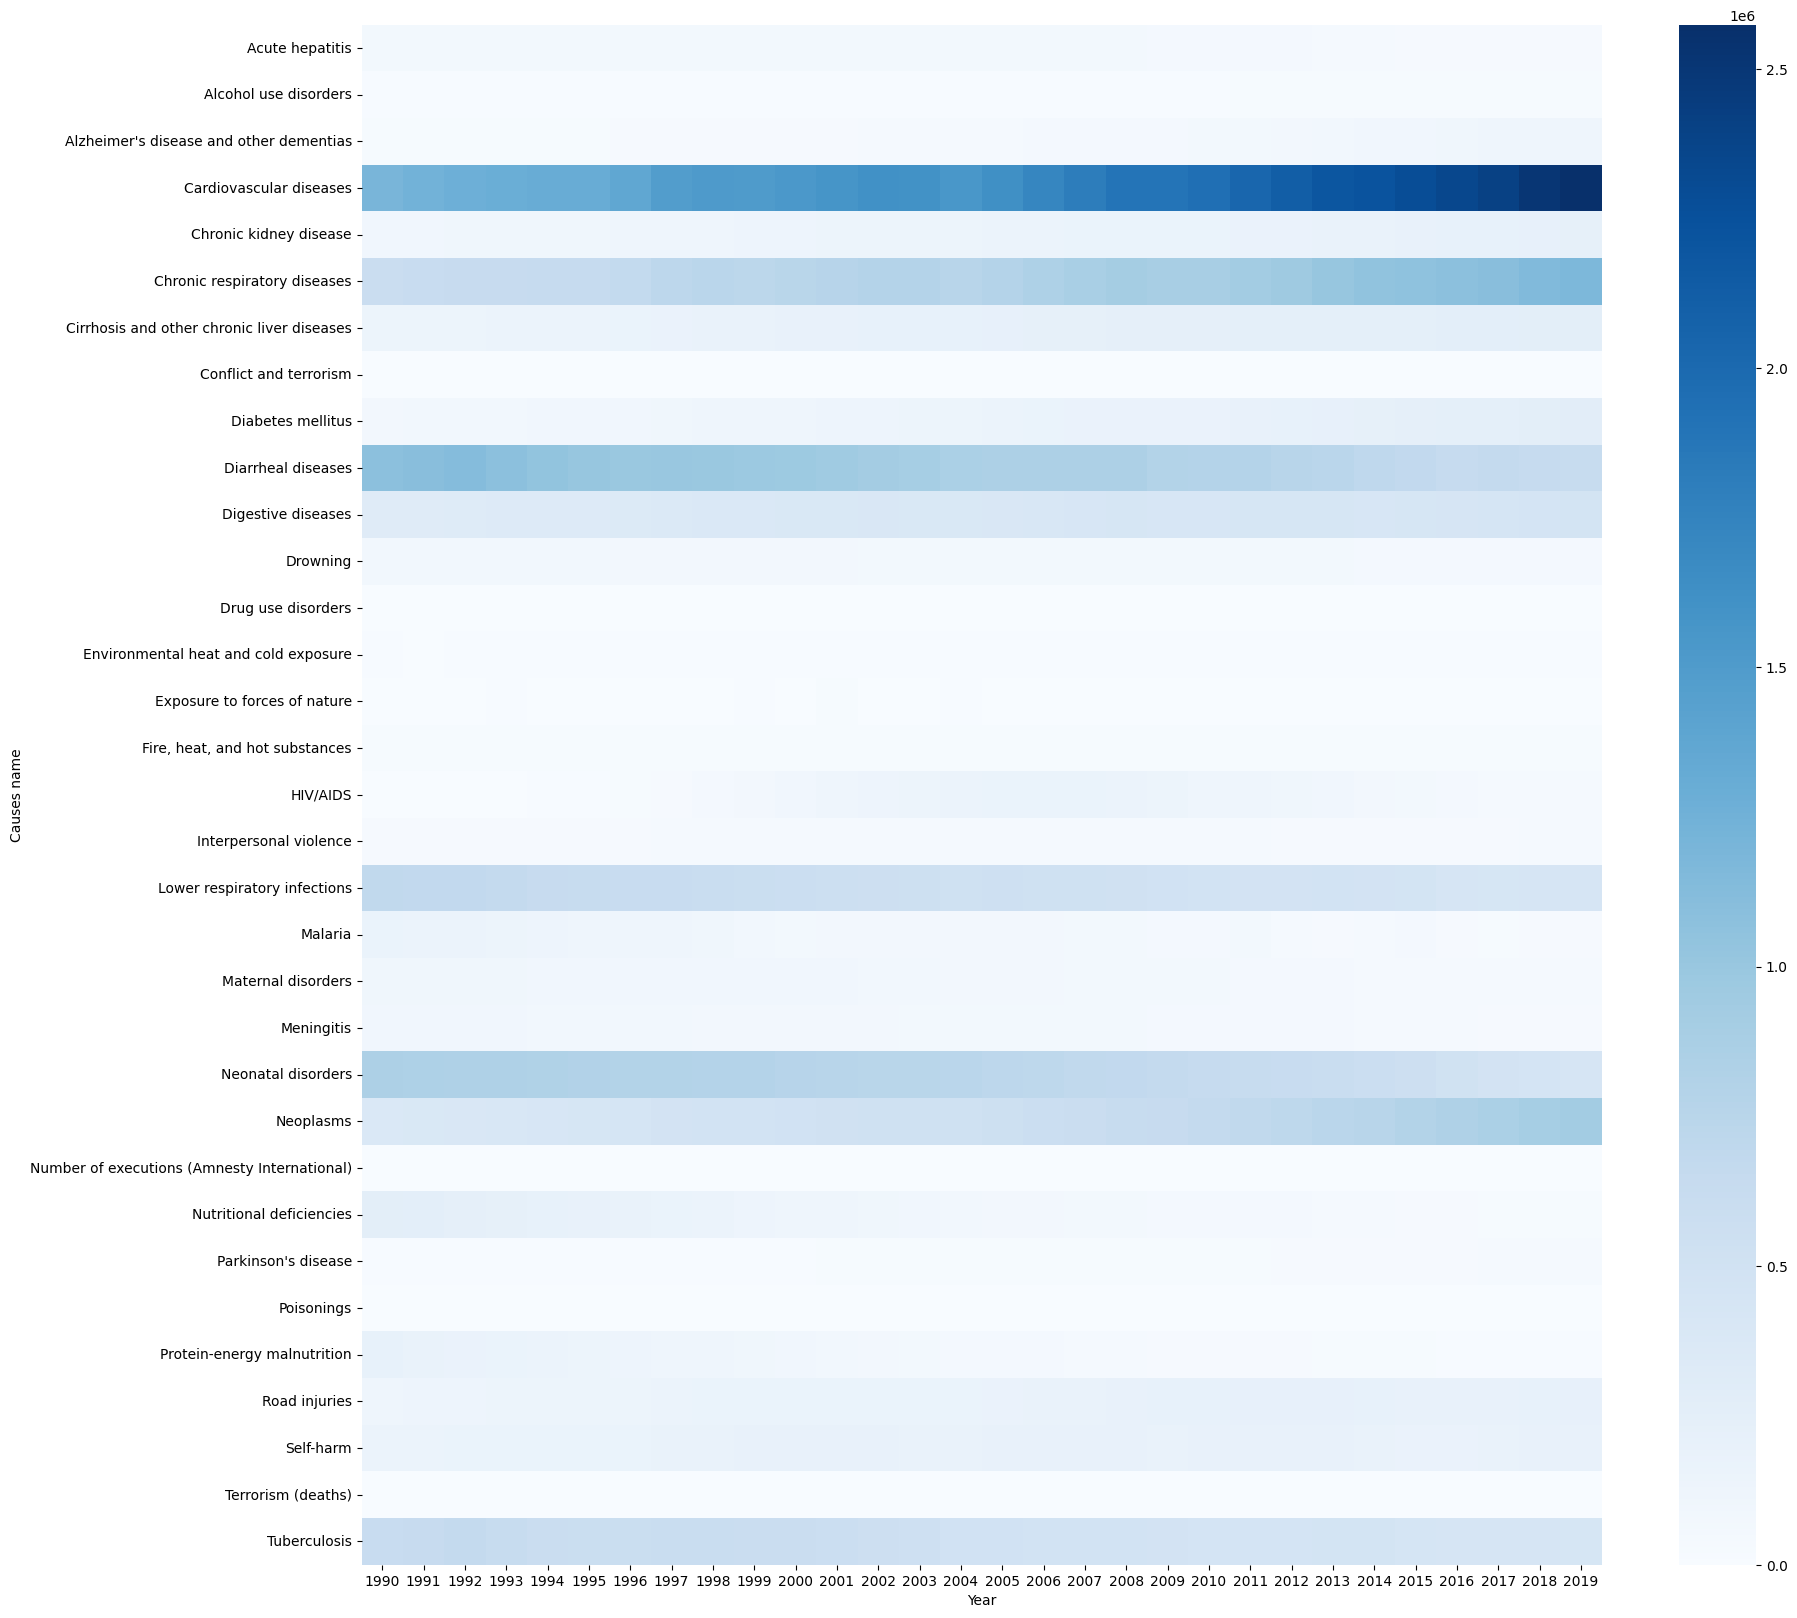

In [106]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.pivot_table(INDDatasetCleaned, values='Death Numbers', columns='Year', index='Causes name'), cmap="Blues")
plt.show()

FIGURE 8

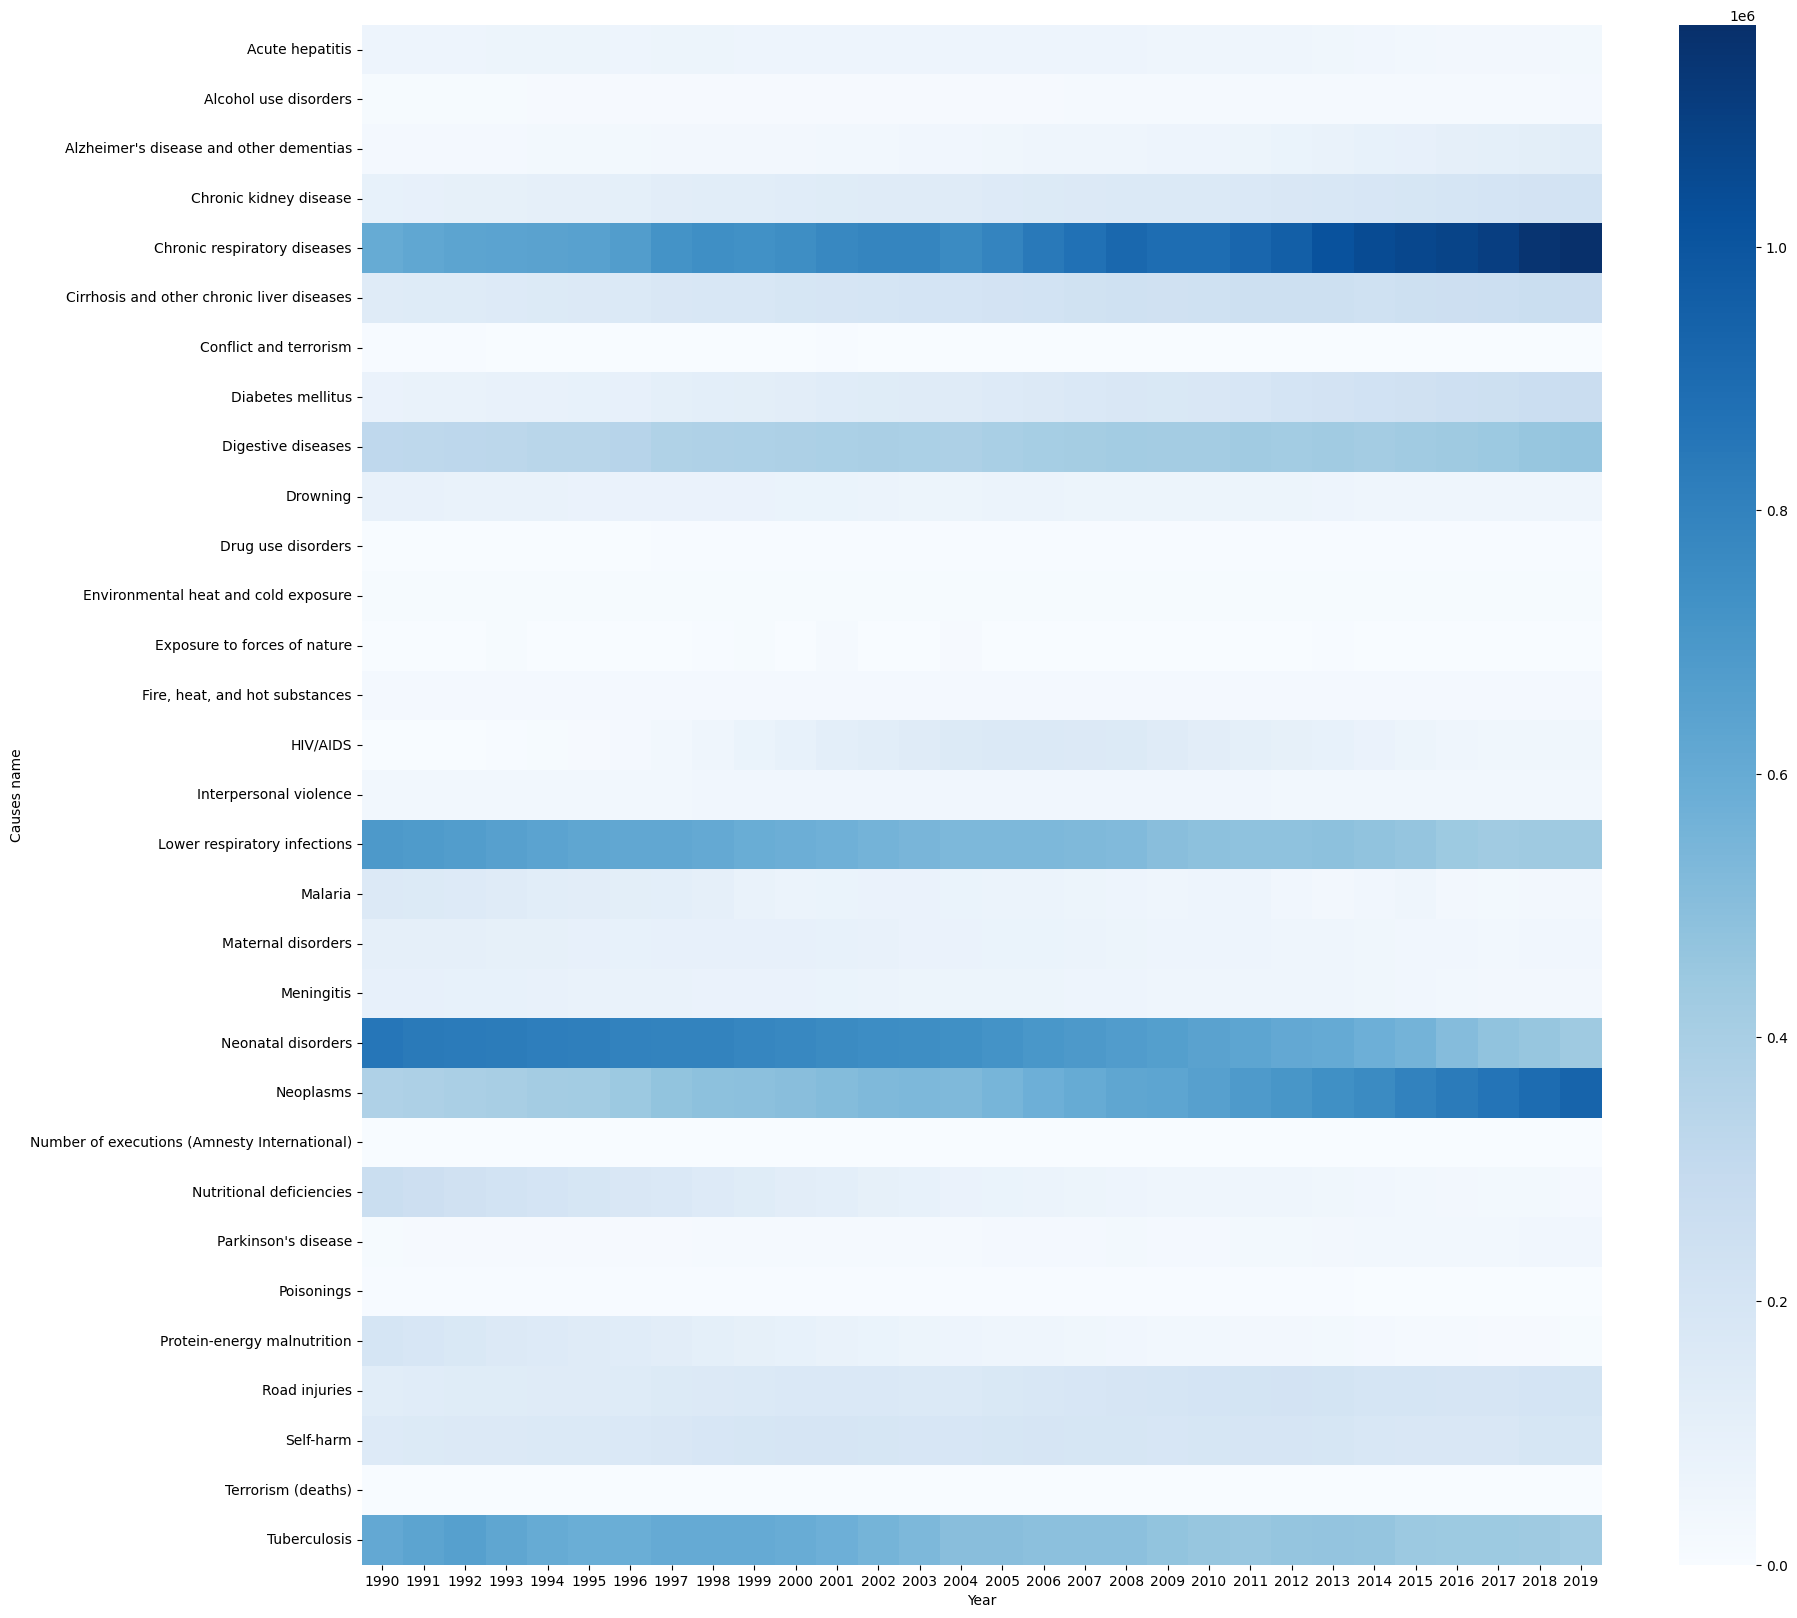

In [107]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.pivot_table(removedTopData, values='Death Numbers', columns='Year', index='Causes name'), cmap="Blues")
plt.show()

FIGURE 9

# Peak Death Causes and Years
Figure 8 shows that cardiovascular diseases had the highest peak of all other death causes, where it peaked at 2019. Diarrheal diseases does not follow cardiovascular disease peaking and was instead peaking at late 1990s. Figure 9 shows that Neoplasms peaked at 2019 while Neonatal disorder, Tuberculosis and Lower respiratory infections  peaked during late 1990s.

# Conclusion
India's total yearly deaths are steadily increasing and have a negetive correlation with yearly birth, however theere is an identified upwards trend. India's population is not declining as the annual births is 3x higher than the annual deaths however this does not take in account migrations out of India. The three death causes that should recieve funding for awareness are cardiovascular disease, Diarrheal diseases and chronic respiratory disease. The three least death causes that require funding is Drug use, executions and terrorism. Cardiovascular disease at 2019 had the highest annual death of all other causes.